In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:

data = {
    'Model': ['GPT-3', 'GPT-2', 'BERT', 'T5', 'BART'],
    'Perplexity': [20, 30, 25, 22, 28],
    'BLEU Score': [40, 35, 30, 33, 37],
    'Inference Time (s)': [2, 1.5, 0.8, 1.2, 1],
    'Model Size (MB)': [3500, 1500, 1200, 1100, 1600]
}

df = pd.DataFrame(data)

In [3]:
# Define the weights for each criterion (assuming equal importance for simplicity)
weights = np.array([1, 1, 1, 1])

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.iloc[:, 1:])

# Create the normalized decision matrix
df_normalized = pd.DataFrame(normalized_data, columns=df.columns[1:], index=df['Model'])

# Calculate the weighted normalized decision matrix
weighted_normalized_data = normalized_data * weights

# Create the weighted normalized decision matrix
df_weighted_normalized = pd.DataFrame(weighted_normalized_data, columns=df.columns[1:], index=df['Model'])

In [4]:
 #Define the ideal and negative ideal solutions
ideal_solution = np.max(weighted_normalized_data, axis=0)
negative_ideal_solution = np.min(weighted_normalized_data, axis=0)

# Calculate the Euclidean distance from the ideal and negative ideal solutions
distance_to_ideal = np.linalg.norm(weighted_normalized_data - ideal_solution, axis=1)
distance_to_negative_ideal = np.linalg.norm(weighted_normalized_data - negative_ideal_solution, axis=1)

In [5]:
# Calculate the performance score
performance_score = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)

# Add performance score to the dataframe
df['Performance Score'] = performance_score

# Rank models based on performance score
df['Rank'] = df['Performance Score'].rank(ascending=False)

# Display the results
df = df.sort_values(by='Rank')

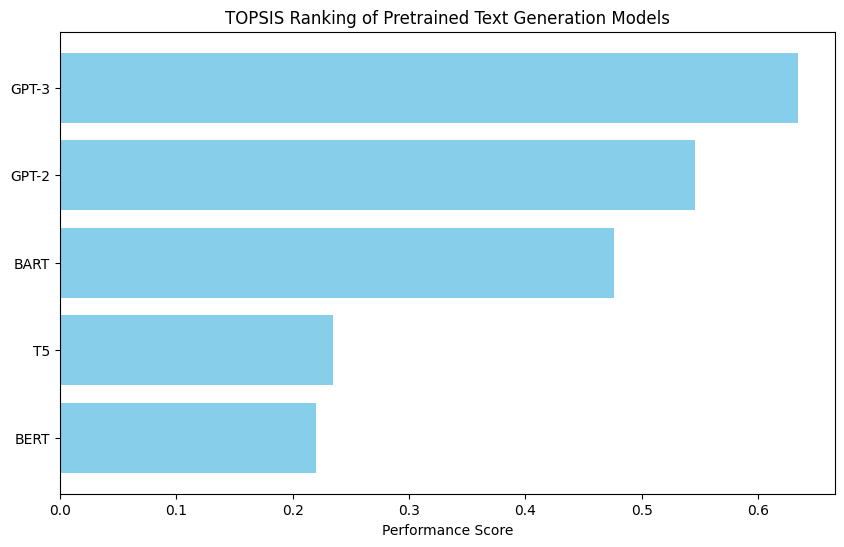

,Model,Perplexity,BLEU Score,Inference Time (s),Model Size (MB),Performance Score,Rank
0,GPT-3,20,40,2.0,3500,0.633975,1.0
1,GPT-2,30,35,1.5,1500,0.546073,2.0
4,BART,28,37,1.0,1600,0.476384,3.0
3,T5,22,33,1.2,1100,0.234322,4.0
2,BERT,25,30,0.8,1200,0.219891,5.0


In [6]:

plt.figure(figsize=(10,6))
plt.barh(df['Model'], df['Performance Score'], color='skyblue')
plt.xlabel('Performance Score')
plt.title('TOPSIS Ranking of Pretrained Text Generation Models')
plt.gca().invert_yaxis()  
plt.show()

# Display the final table with rankings
df